In [3]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


Importing

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

MAIN_DIR = "D:\\College_Semesters\\6th Semester\\C. Deep Learning for Signal & Image Processing\\Project_New\\Dataset"
SEED = 40
os.listdir(MAIN_DIR)

['aii ki matra',
 'cha',
 'ee ki matra',
 'ka',
 'la',
 'ma',
 'ma with oo ki matra',
 'nna',
 'nnna',
 'nu',
 'nuu',
 'oo',
 'pa',
 'ra',
 't',
 'tha',
 'va',
 'vee',
 'vu',
 'y',
 'ya']

In [3]:
def load_images(folder):
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                if img.shape[-1] == 1:
                    # convert grayscale image to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                img = cv2.resize(img,(224,224))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [4]:
data, labels = load_images(MAIN_DIR)

In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(labels)
y = encoder.transform(labels)

y_one_hot = to_categorical(y, num_classes=21) # One-hot encode the target variable

norm_data = data / 255. 
norm_data.shape, norm_data[0]

((2698, 224, 224, 3),
 array([[[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.4       , 0.50588235],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        ...,
 
        [[0.16470588, 0.36862745, 0.48627451],
         [0.1647058

In [6]:
# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Train Data Shape:", train_data.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Data Shape:", test_data.shape)
print("Test Labels Shape:", test_labels.shape)

Train Data Shape: (2158, 224, 224, 3)
Train Labels Shape: (2158,)
Test Data Shape: (540, 224, 224, 3)
Test Labels Shape: (540,)


In [7]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=21)
test_labels = to_categorical(test_labels, num_classes=21)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Create the LeNet-5 model
model = Sequential()

# Add the layers
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=norm_data.shape[1:]))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(21, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/50
68/68 [==============================] - 111s 2s/step - loss: 3.6766 - accuracy: 0.5533 - val_loss: 0.9149 - val_accuracy: 0.8000
Epoch 2/50
68/68 [==============================] - 122s 2s/step - loss: 0.5591 - accuracy: 0.8772 - val_loss: 0.8816 - val_accuracy: 0.8074
Epoch 3/50
68/68 [==============================] - 132s 2s/step - loss: 0.1689 - accuracy: 0.9629 - val_loss: 1.0921 - val_accuracy: 0.8426
Epoch 4/50
68/68 [==============================] - 63s 939ms/step - loss: 0.0623 - accuracy: 0.9829 - val_loss: 1.2513 - val_accuracy: 0.8407
Epoch 5/50
68/68 [==============================] - 29s 432ms/step - loss: 0.0570 - accuracy: 0.9866 - val_loss: 1.3260 - val_accuracy: 0.8463
Epoch 6/50
68/68 [==============================] - 29s 433ms/step - loss: 0.1063 - accuracy: 0.9768 - val_loss: 0.9637 - val_accuracy: 0.8556
Epoch 7/50
68/68 [==============================] - 31s 457ms/step - loss: 0.0185 - accuracy: 0.9935 - val_loss: 1.3596 - val_accuracy: 0.8593
Epoch

In [11]:
model.save("LeNet_2.h5")

Saved model 

In [12]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# # Create the LeNet-5 model
# model = Sequential()

# # Add the layers
# model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=norm_data.shape[1:]))
# model.add(AveragePooling2D(pool_size=(2, 2)))
# model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# model.add(AveragePooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(18, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [13]:
# import tensorflow as tf

# # Load the saved model
# model = tf.keras.models.load_model('D:\\College_Semesters\\6th Semester\\C. Deep Learning for Signal & Image Processing\\Project_New\\Project\\LeNet_1.h5')

In [14]:
# Evaluate the model on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)

accuracy = np.mean(predicted_labels == true_labels)
print('Accuracy:', accuracy*100)

17/17 [==============================] - 2s 118ms/step - loss: 1.6712 - accuracy: 0.8796
Test Loss: 1.6711735725402832
Accuracy: 87.96296296296296


In [15]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

17/17 [==============================] - 2s 120ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.81      0.74      0.77        23
           2       0.90      0.85      0.87        52
           3       0.80      0.80      0.80        35
           4       0.86      0.86      0.86        21
           5       0.94      0.91      0.92        33
           6       0.94      0.91      0.92        32
           7       0.86      0.86      0.86        28
           8       0.68      0.88      0.77        17
           9       0.76      0.93      0.83        27
          10       0.96      0.93      0.95        28
          11       0.83      0.92      0.87        26
          12       0.76      0.94      0.84        17
          13       0.95      0.95      0.95        20
          14       0.97      1.00      0.99        34
          15       1.00      0.67      0.80        15
          16       0.90   

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 average_pooling2d_4 (Averag  (None, 110, 110, 6)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 53, 53, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 44944)             0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [17]:
# history = model.history

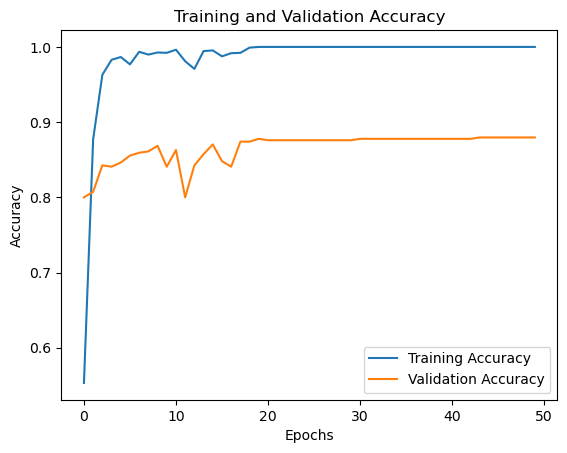

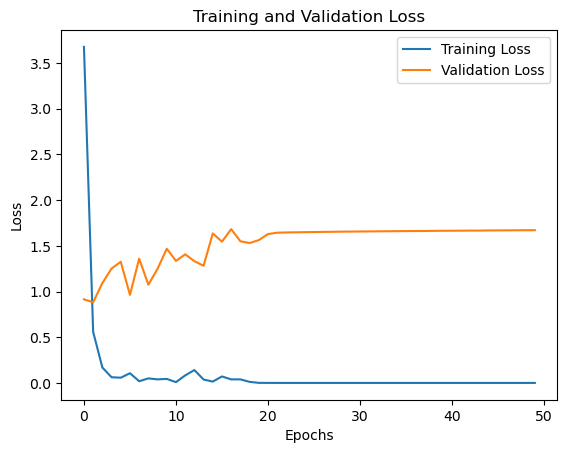

In [19]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# # Plot training and validation accuracy
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Plot training and validation accuracy
# plt.plot(model.model['accuracy'], label='Training Accuracy')
# plt.plot(model.model['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()